In [5]:
import geopandas as gpd
import requests as req
import matplotlib.pyplot as plt

In [6]:
API_ROUTE = 'https://oaiee.scj.gov.co/agc/rest/services'

In [7]:
EPSG_CRS = 4686

# _**LAYER: Delitos de Alto Impacto**_

In [8]:
DAI_layer_0 = f'{API_ROUTE}/Tematicos_Pub/CifrasSCJ/MapServer/0'
DAI_fields_route = f'{DAI_layer_0}/query?where=1=1&outFields=*&f=geojson'
DAI_metadata_route = f'{DAI_layer_0}?f=pjson'
DAI_metadata = req.get(DAI_metadata_route).json()

In [9]:
DAI = gpd.read_file(DAI_fields_route).to_crs(epsg=EPSG_CRS)

# _**LAYER: Incidentes Reportados Sector Catastral**_

In [10]:
IR_Layer_7 = f'{API_ROUTE}/Tematicos_Pub/CifrasSCJ/MapServer/7'
IR_fields_route = f'{IR_Layer_7}/query?where=1%3D1&text=&objectIds=&time=&timeRelation=esriTimeRelationOverlaps&geometry=&geometryType=esriGeometryEnvelope&inSR=&spatialRel=esriSpatialRelIntersects&distance=&units=esriSRUnit_Foot&relationParam=&outFields=*&returnGeometry=true&returnTrueCurves=false&maxAllowableOffset=&geometryPrecision=&outSR=&havingClause=&returnIdsOnly=false&returnCountOnly=false&orderByFields=&groupByFieldsForStatistics=&outStatistics=&returnZ=false&returnM=false&gdbVersion=&historicMoment=&returnDistinctValues=false&resultOffset=&resultRecordCount=&returnExtentOnly=false&sqlFormat=none&datumTransformation=&parameterValues=&rangeValues=&quantizationParameters=&featureEncoding=esriDefault&f=geojson'
IR_metadata_route = f'{IR_Layer_7}?f=pjson'
IR_metadata = req.get(IR_metadata_route).json()

In [11]:
IR = gpd.read_file(IR_fields_route).to_crs(epsg=EPSG_CRS)

# _**LAYER: Cuadrante de Policía**_

In [12]:
CP_layer_25 = f'{API_ROUTE}/Tematicos_NR/EquipamientoPMSDSCJ/MapServer/25'
CP_fields_route = f'{CP_layer_25}/query?where=1=1&outFields=*&f=geojson'
CP_metadata_route = f'{CP_layer_25}?f=pjson'
CP_metadata = req.get(CP_metadata_route).json()

In [13]:
CP = gpd.read_file(CP_fields_route).to_crs(epsg=EPSG_CRS)

# _**LAYER: Comando de Atención Inmediata**_

In [14]:
CAI_layer_22 = f'{API_ROUTE}/Tematicos_NR/EquipamientoPMSDSCJ/MapServer/22'
CAI_fields_route = f'{CAI_layer_22}/query?where=1=1&outFields=*&f=geojson'
CAI_metadata_route = f'{CAI_layer_22}?f=pjson'
CAI_metadata = req.get(CAI_metadata_route).json()

In [15]:
CAI = gpd.read_file(CAI_fields_route).to_crs(epsg=EPSG_CRS)

# ***MERGING: Plotting Layers***

# _Cuadrante de Policia + Comando de Atención Inmediata_

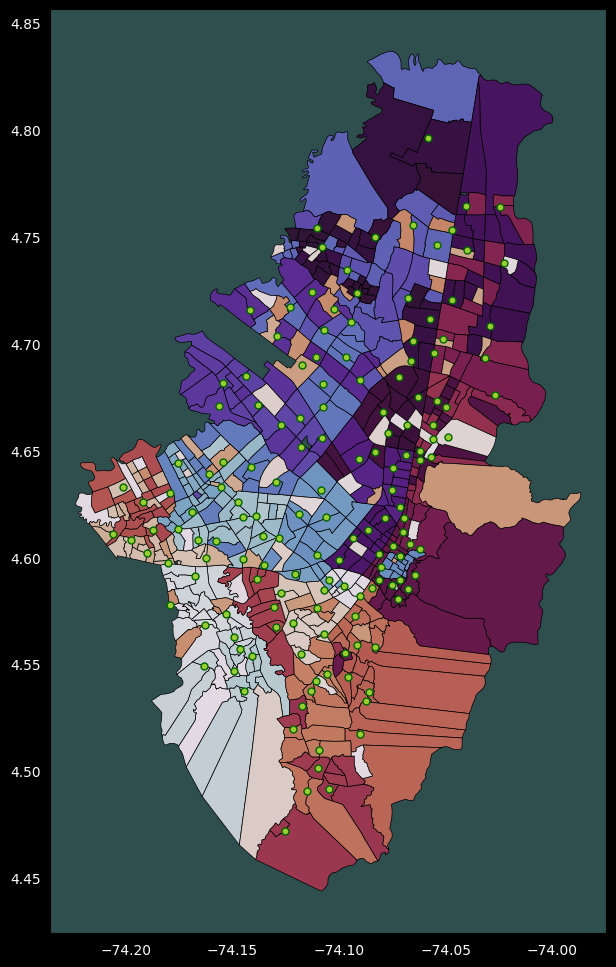

In [25]:
fig, ax = plt.subplots(figsize = (12, 12))
CP.plot(ax = ax, cmap='twilight', edgecolor='black', linewidth=0.5)
#IR.plot(ax = ax, color='none', linewidth=1, edgecolor='black')
CAI.plot(ax = ax, color='yellowgreen', edgecolor='darkgreen', markersize=25)
fig.set_facecolor('black')
ax.set_facecolor(color='darkslategray')
ax.tick_params(labelcolor='snow')

# _Cuadrante de Policia + Delitos de Alto Impacto + Comando de Atención Inmediata_

In [17]:
#fig, ax = plt.subplots(figsize = (35, 35))
#DAI.plot(ax = ax, cmap='coolwarm', edgecolor='black', linewidth=1.5, column='CMHP24CONT')
#CP.plot(ax = ax, color='none', edgecolor='black', linewidth=0.5)
#CAI.plot(ax = ax, color='yellowgreen', edgecolor='seagreen', markersize=15)

# _**COMPARATIVA: Presencia Policial VS LLamados y Denuncias por Hurto**_
# _*SE HALLA UNA DISCREPANCIA ENTRE LA CANTIDAD DE LLAMADAS Y EL NUMERO DE DELITOS REGISTRADOS: SE EVIDENCIAN MAS HURTOS PERO MENOS LLAMADAS POR ESTE MISMO DELITO TENIENDO EN CUENTA LAS ZONAS ROJAS (Cifras mas altas)*_

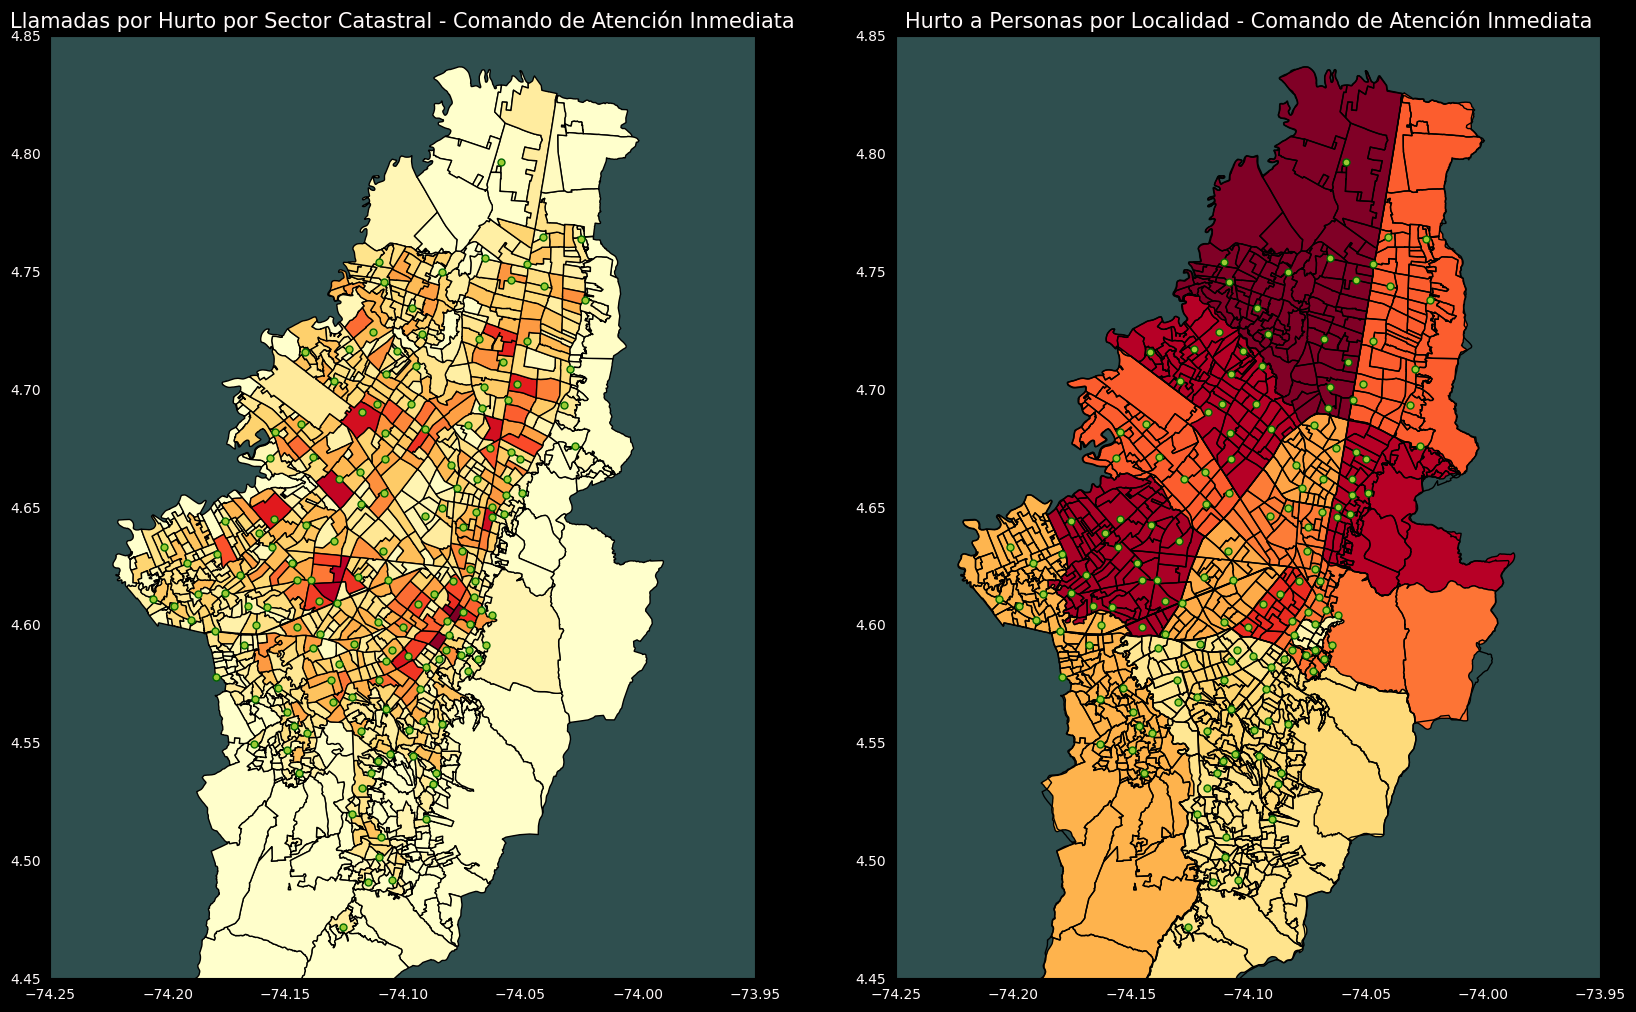

In [24]:
fig, axs = plt.subplots(ncols=2, figsize = (20, 20))
fig.set_facecolor('black')

def eda_map(axs, IR, CAI, DAI=None, title=''):
    if DAI is not None:
        DAI.plot(ax = axs, cmap='YlOrRd', column='CMHP24CONT', linewidth=1, edgecolor='black')
        IR.plot(ax = axs, color='none', linewidth=1, edgecolor='black')
        CAI.plot(ax = axs, color='yellowgreen', edgecolor='darkgreen', markersize=25)
    else:
        IR.plot(ax = axs, cmap='YlOrRd', column='CMH24CONT', linewidth=1, edgecolor='black')
        CAI.plot(ax = axs, color='yellowgreen', edgecolor='darkgreen', markersize=25)
    axs.set_facecolor(color='darkslategray')
    axs.tick_params(labelcolor='snow')
    axs.set_title(title, color='snow', size=15)
    axs.set_ylim(4.45, 4.85)
    axs.set_xlim(-74.25, -73.95)

eda_map(axs[0], IR, CAI, title='Llamadas por Hurto por Sector Catastral - Comando de Atención Inmediata')
eda_map(axs[1], IR, CAI, DAI, title='Hurto a Personas por Localidad - Comando de Atención Inmediata')

# _**AGRUPACIÓN DE DATOS: Código de Localidad, Nombre de Localidad, Delito Hurto a Personas por Localidad (Sondeo temporal para el periodo 2024)**_

In [19]:
DAI[['CMIULOCAL', 'CMNOMLOCAL', 'CMHP24CONT']].drop_duplicates().sort_values('CMIULOCAL')

,CMIULOCAL,CMNOMLOCAL,CMHP24CONT
10,01,Usaquén,2835
2,02,Chapinero,4227
18,03,Santa Fe,2613
11,04,San Cristóbal,1130
12,05,Usme,866
17,06,Tunjuelito,793
13,07,Bosa,1746
14,08,Kennedy,4347
0,09,Fontibón,2844
15,10,Engativá,4242


In [20]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.colors as colors

<Axes: title={'center': '43138 Hurtos a Personas en Bogotá'}>

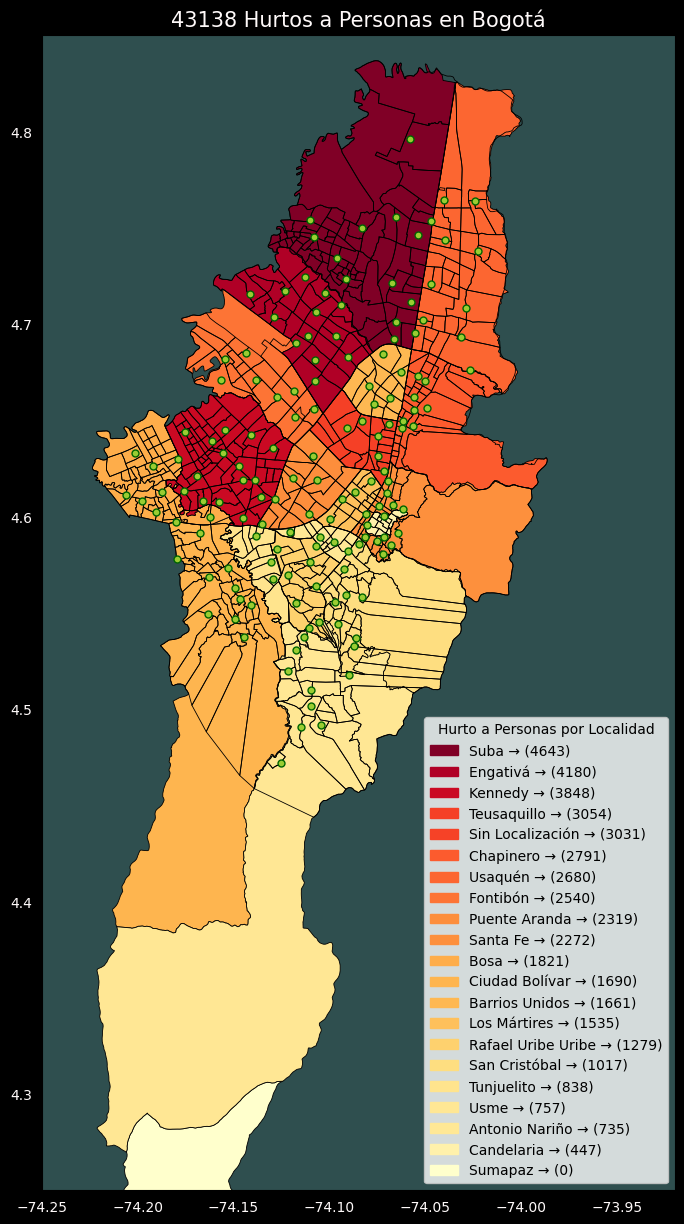

In [31]:
norm = colors.Normalize(vmin=DAI['CMHP25CONT'].min(), vmax=DAI['CMHP25CONT'].max())
cmap = plt.cm.YlOrRd

fig, ax = plt.subplots(figsize=(15, 15))
fig.set_facecolor(color='black')

legend_items = []
for idx, row in DAI.iterrows():
    nombre = row['CMNOMLOCAL']
    valor = row['CMHP25CONT']
    color = cmap(norm(valor))
    
    patch = mpatches.Patch(color=color, label=f'{nombre} → ({valor})')
    legend_items.append(patch)

legend_items = sorted(legend_items, key=lambda x: int(x.get_label().split('(')[-1][:-1]), reverse=True)

ax.legend(
    handles=legend_items,
    loc='lower right',
    title='Hurto a Personas por Localidad',
    fontsize='medium',
    title_fontsize='medium',
    frameon=True
)

hurtos_totales = DAI.CMHPTOTAL[0]

ax.set_title(f'{hurtos_totales} Hurtos a Personas en Bogotá', color='snow', size=15)
ax.set_facecolor('darkslategray')
ax.tick_params(labelcolor='snow')
ax.set_ylim(4.25, 4.85)
ax.set_xlim(-74.25, -73.92)

DAI.plot(ax=ax, column='CMHP25CONT', cmap=cmap, edgecolor='black', linewidth=0.6)
CP.plot(ax = ax, color='none', edgecolor='black', linewidth=0.6)
CAI.plot(ax = ax, color='yellowgreen', edgecolor='darkgreen', markersize=25)